In [5]:
import Pkg;
Pkg.activate(@__DIR__);
Pkg.add("LaTeXStrings");
Pkg.add("Plots");
Pkg.add("ForwardDiff");
Pkg.instantiate();

  Activating new project at `/workspaces/CMU-16-745/playground/newtons`
   Resolving package versions...
    Updating `/workspaces/CMU-16-745/playground/newtons/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.0
    Updating `/workspaces/CMU-16-745/playground/newtons/Manifest.toml`
  [b964fa9f] + LaTeXStrings v1.3.0
   Resolving package versions...


    Updating `/workspaces/CMU-16-745/playground/newtons/Project.toml`
  [91a5bcdd] + Plots v1.39.0
    Updating `/workspaces/CMU-16-745/playground/newtons/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [944b1d66] + CodecZlib v0.7.2
  [35d6a980] + ColorSchemes v3.23.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.10
  [34da2185] + Compat v4.9.0
  [f0e56b4a] + ConcurrentUtilities v2.2.1
  [d38c429a] + Contour v0.6.2
  [9a962f9c] + DataAPI v1.15.0
  [864edb3b] + DataStructures v0.18.15
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensions v0.9.3
  [460bff9d] + ExceptionUnwrapping v0.1.9
  [c87230d0] + FFMPEG v0.4.1
  [53c48c17] + FixedPointNumbers v0.8.4
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.72.9
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.9.15
  [92d709cd] + IrrationalConstants v0.2.2
  [1019f520] + JLFzf v0.1.5
  [692b3bcd] + JLLWrappers v1.5.0
  [682c06a0] + JSON v0.21.4
  [23fbe1c1] + Lat

   Resolving package versions...


    Updating `/workspaces/CMU-16-745/playground/newtons/Project.toml`
  [f6369f11] + ForwardDiff v0.10.36
    Updating `/workspaces/CMU-16-745/playground/newtons/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [f6369f11] + ForwardDiff v0.10.36
  [276daf66] + SpecialFunctions v2.3.1
  [1e83bf80] + StaticArraysCore v1.4.2
  [efe28fd5] + OpenSpecFun_jll v0.5.5+0


In [6]:
import ForwardDiff as FD

function newton_step(f::Function, x::Real)::Real
    x - (FD.derivative(f,x))^-1 * f(x)
end

newton_step (generic function with 1 method)

┌ Info: Saved animation to /tmp/jl_NwvkdC1AzU.gif
└ @ Plots /opt/julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_NwvkdC1AzU.gif")
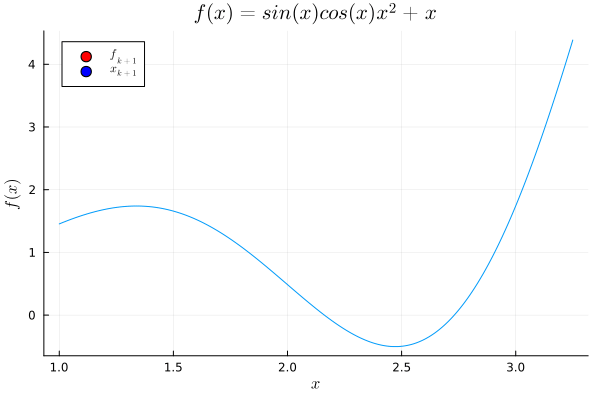

In [7]:
using Plots
using LaTeXStrings

# The funcion to find the root of 
f = x -> sin(x)*cos(x)*x^2 + x

# For the initial plot
x = 1:0.001:3.25
y = [f(i) for i in x]

anim = Animation()
plt = plot(x, y, title=L"f(x) = sin(x)cos(x)x^2 + x", label="", xlabel=L"x", ylabel=L"f(x)")
plot!([], [], seriestype=:scatter, color=:red, label=L"f_{k+1}")
plot!([], [], seriestype=:scatter, color=:blue, label=L"x_{k+1}")
frame(anim, plt)

# Initial guess and frame
x = 1.5
plot!([x], [f(x)], seriestype=:scatter, color=:red, label="")
frame(anim, plt)
for i=1:4
    # Take a step
    x1 = newton_step(f, x)
    
    # Intercept
    plot!([x; x1], [f(x); 0.], color=:black, ls=:dash, label="")
    plot!([x1], [0.], seriestype=:scatter, color=:blue, label="")
    frame(anim, plt)

    # 
    plot!([x1; x1], [0.; f(x1)], color=:black, ls=:dash, label="")
    plot!([x1], [f(x1)], seriestype=:scatter, color=:red, label="")
    frame(anim, plt)

    x=x1
end

gif(anim, fps=1)